Given:
$$x = \{x_1,x_2,\cdots,x_d\}$$
$$P(x) = \frac{1}{Z}e^{\mu(x_1x_2+x_2x_3+ \cdots +x_{d-1}x_d)}$$
$$x_i = \pm 1$$
$$\mu = 2$$	
$$d = 10$$
$$M = \frac{1}{d}(x_1 + x_2 + \cdots + x_d)$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

%matplotlib inline

# for random sampling uncomment the following lines
# import time
# np.random.seed(int(time.time()))

# for reproducibility uncomment the following line
np.random.seed(42)


In [2]:
# Distribution and Utils

d = 10
mu = 2
N = int(1e5)


def distribution(
    x: np.ndarray,
) -> float:
    s = np.dot(x[:-1], x[1:])
    return np.exp(mu * s)

# END def distribution


def init_x() -> np.ndarray:
    return np.random.choice([-1, 1], d)  # type: ignore
# END def init_x


def get_magnetization(
    X: np.ndarray,
) -> np.ndarray:
    return np.mean(X, axis=1)
# END def get_magnetization


def plot_magnetization(
    magnetization: np.ndarray,
):
    n = len(magnetization)

    _, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

    # magnetization vs iteration
    axs[0].plot([magnetization[i] for i in range(0, n, 100)])
    axs[0].set_xlabel("Iteration")
    axs[0].set_ylabel("Magnetization")

    # plot histogram of magnetization
    axs[1].hist(magnetization, bins=100)
    axs[1].set_xlabel("Magnetization")
    axs[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    # Relative frequency of magnetization
    freq = {m: 0 for m in magnetization}
    for m in magnetization:
        freq[m] += 1

    for key, value in sorted(freq.items(), key=lambda x: x[0]):
        print("{} : {}".format(key, value))
    
    print("\n")
# END def plot_magnetization


Use Gibbs sampling to approximate the above distribution. Each sample represents a magnetization state of the lattice. Plot the variation of total magnetization M of the individual samples obtained at each epoch over the iterations. Also, plot the histogram of the final approximated distribution.

In [3]:
# Gibbs Sampling

def Gibbs_Sampler(
    x_init: np.ndarray,
    n_iter: int,
) -> np.ndarray:

    X = np.zeros((n_iter, d))
    x = x_init

    for i in tqdm(range(n_iter)):
        for j in range(d):
            x[j] = -1
            val_m1 = distribution(x)
            x[j] = 1
            val_p1 = distribution(x)
            p = val_p1 / (val_m1 + val_p1)

            if np.random.rand() < p:
                x[j] = 1
            else:
                x[j] = -1
            # END if

        # END for j

        X[i] = x
    # END for i

    return X

# END def Gibbs_Sampler


[-1  1 -1 -1 -1  1 -1 -1 -1  1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


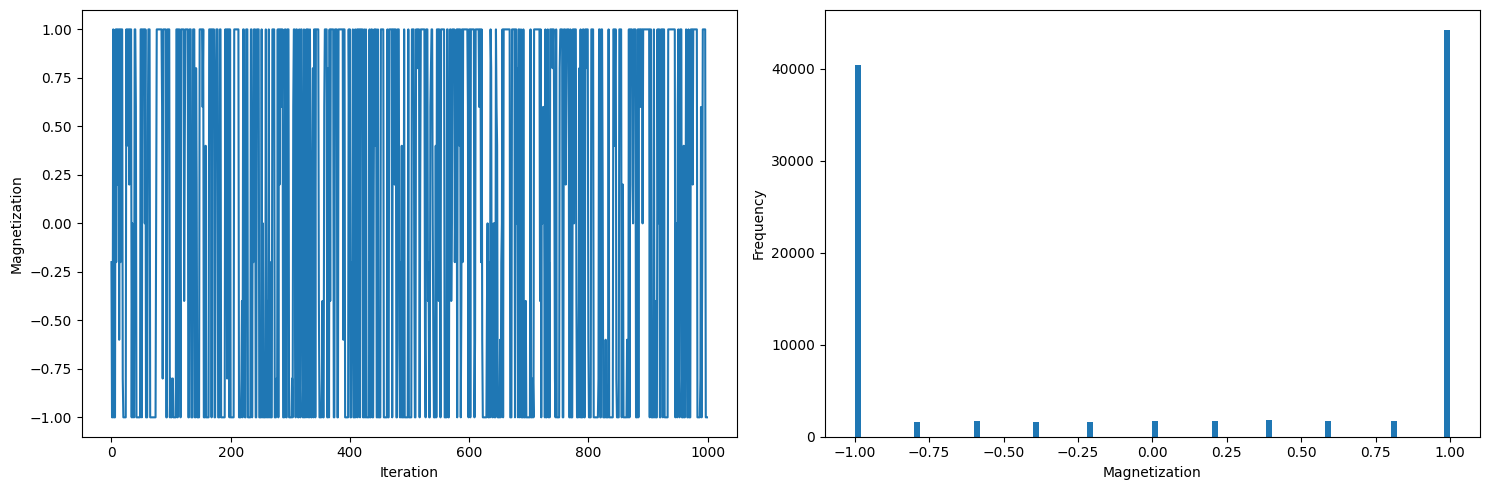

-1.0 : 40376
-0.8 : 1644
-0.6 : 1726
-0.4 : 1643
-0.2 : 1655
0.0 : 1705
0.2 : 1763
0.4 : 1822
0.6 : 1754
0.8 : 1720
1.0 : 44192




In [4]:
x_init = init_x()

print(x_init)
X = Gibbs_Sampler(x_init, N)

magnetization = get_magnetization(X)

print(X.shape)
print(magnetization.shape)

plot_magnetization(magnetization)


Now,  Use Metropolis-Hastings sampling to approximate the above distribution. Plot the variation of total magnetization M over the iterations. Also, plot the histogram of the final approximated distribution. Consider the proposal distribution to be a Gaussian. Study the effect of variance of the Gaussian on the convergence of the sampler

In [5]:
# Metropolis Hastings

def gen_new_x_bernoulli(
    x: np.ndarray,
    theta: float,
):
    return np.array([x[i] if np.random.rand() < theta else -x[i] for i in range(d)])
# END def gen_new_x_bernoulli


def Metropolis_Hastings(
    x_init: np.ndarray,
    theta: float,
    epochs: int,
):
    X = np.zeros((epochs, d))
    x = x_init

    for i in tqdm(range(epochs)):
        # generate new x
        x_new = gen_new_x_bernoulli(x, theta)

        p = distribution(x_new) / distribution(x)
        p = min(1, p)

        if np.random.rand() < p:
            x = x_new
        # END if

        X[i] = x
    # END for i

    return X
# END def metropolis_hastings


Theta = 0.1
x_init = [ 1  1 -1  1  1  1 -1 -1 -1  1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


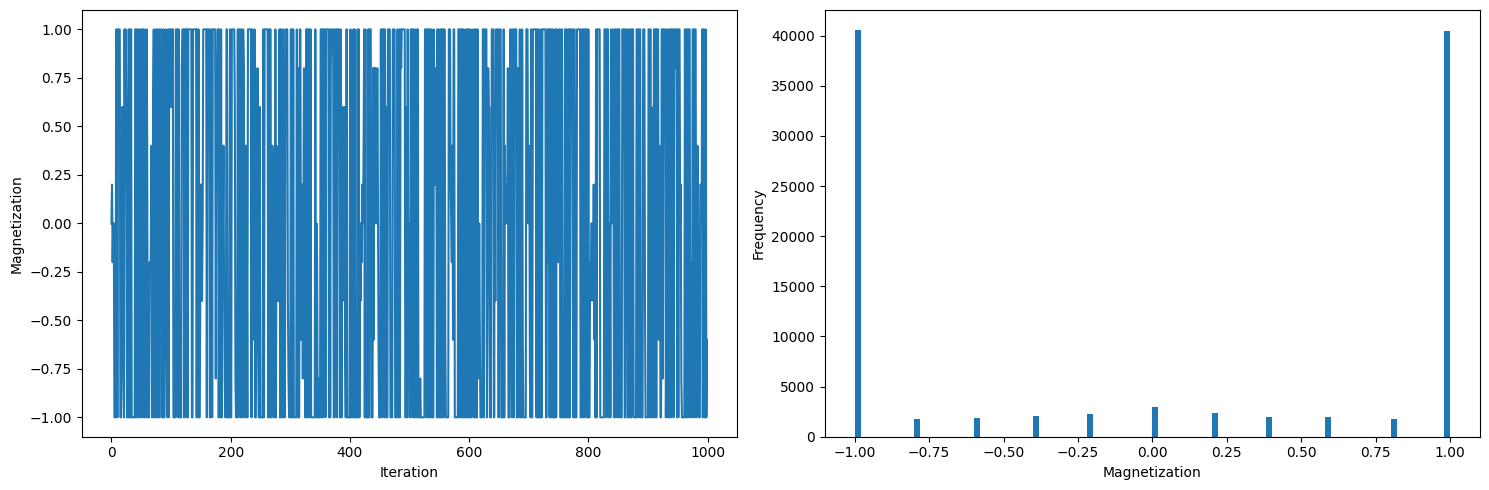

-1.0 : 40536
-0.8 : 1800
-0.6 : 1836
-0.4 : 2028
-0.2 : 2300
0.0 : 2928
0.2 : 2387
0.4 : 2013
0.6 : 1960
0.8 : 1790
1.0 : 40422


Theta = 0.2
x_init = [ 1 -1 -1  1  1 -1  1 -1 -1 -1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


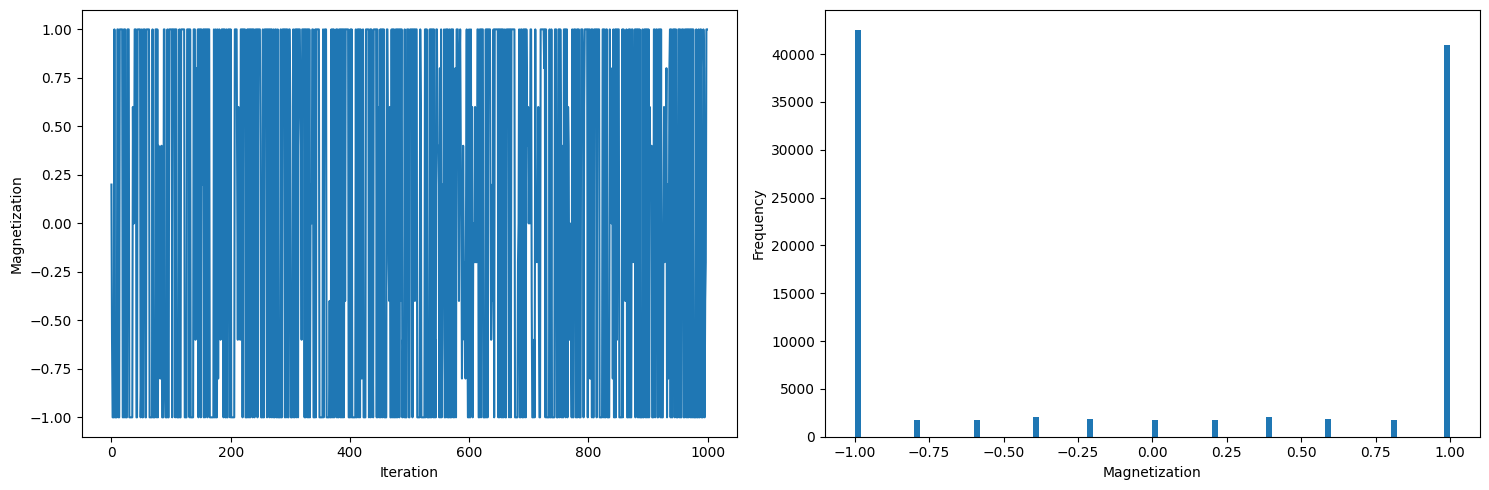

-1.0 : 42493
-0.8 : 1723
-0.6 : 1784
-0.4 : 2114
-0.2 : 1852
0.0 : 1749
0.2 : 1723
0.4 : 2095
0.6 : 1809
0.8 : 1738
1.0 : 40920


Theta = 0.30000000000000004
x_init = [ 1 -1 -1  1 -1 -1 -1 -1  1 -1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


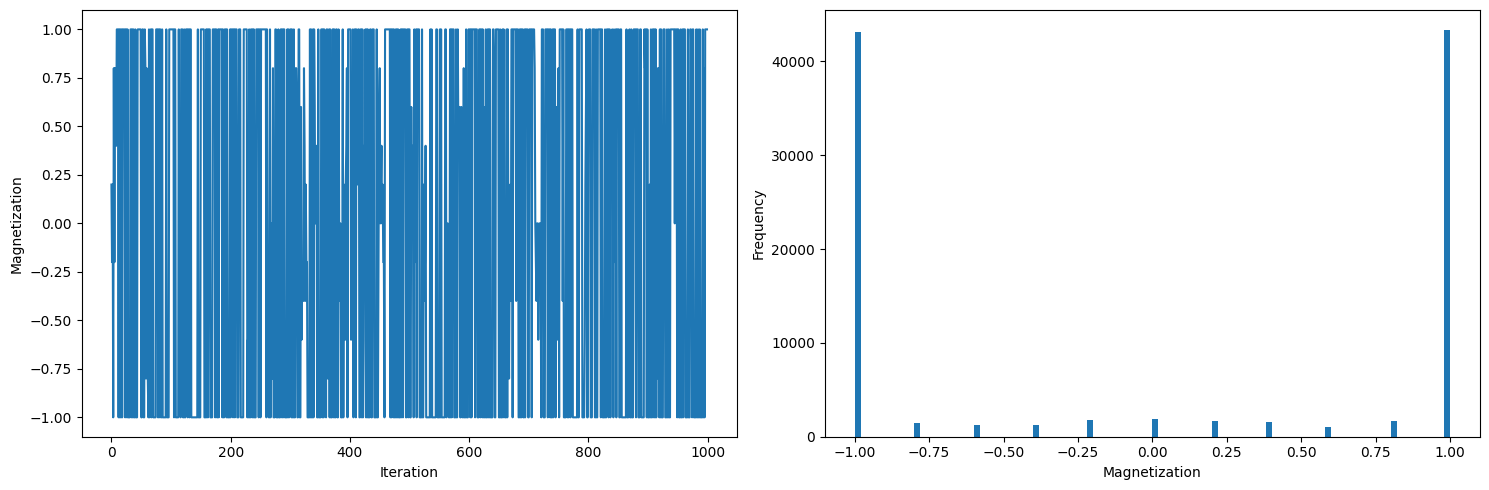

-1.0 : 43121
-0.8 : 1512
-0.6 : 1232
-0.4 : 1224
-0.2 : 1823
0.0 : 1845
0.2 : 1630
0.4 : 1583
0.6 : 1081
0.8 : 1631
1.0 : 43318


Theta = 0.4
x_init = [-1  1  1  1  1 -1  1  1  1 -1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


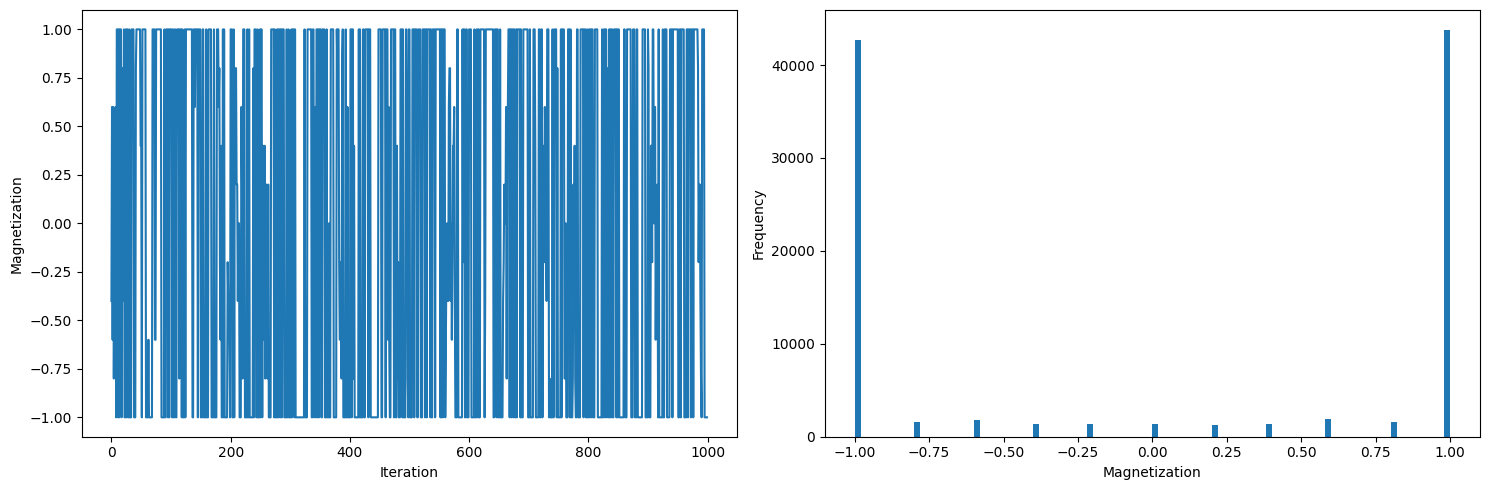

-1.0 : 42660
-0.8 : 1633
-0.6 : 1823
-0.4 : 1361
-0.2 : 1353
0.0 : 1336
0.2 : 1225
0.4 : 1364
0.6 : 1899
0.8 : 1611
1.0 : 43735


Theta = 0.5
x_init = [-1  1 -1  1 -1 -1  1  1 -1  1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


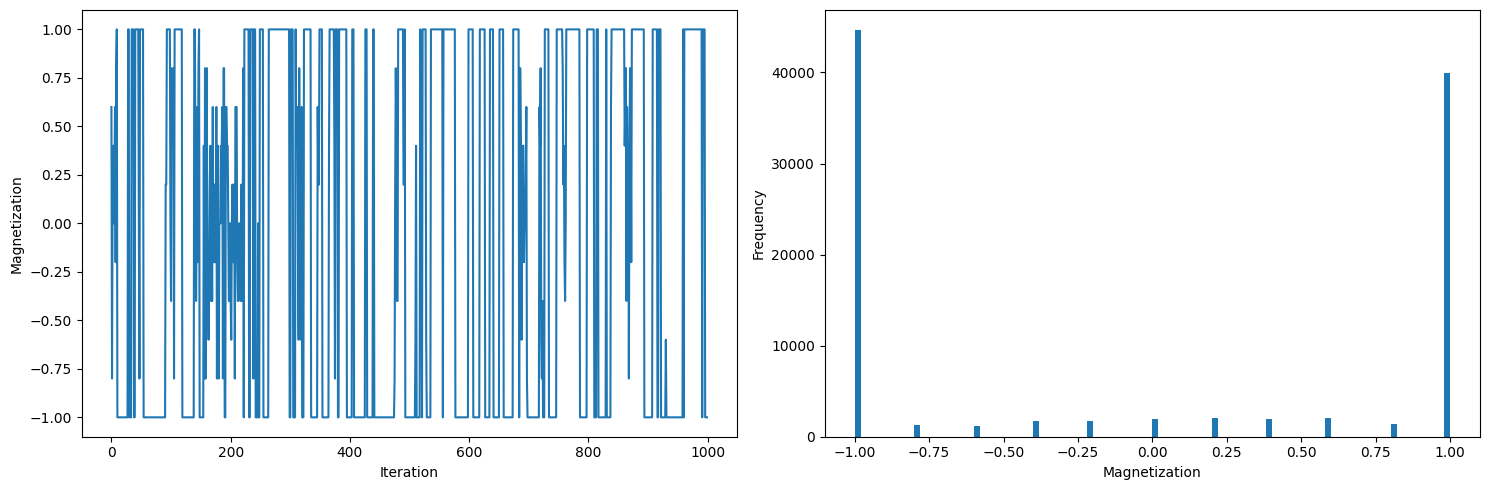

-1.0 : 44632
-0.8 : 1328
-0.6 : 1229
-0.4 : 1733
-0.2 : 1701
0.0 : 1969
0.2 : 2088
0.4 : 1930
0.6 : 2075
0.8 : 1380
1.0 : 39935


Theta = 0.6
x_init = [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


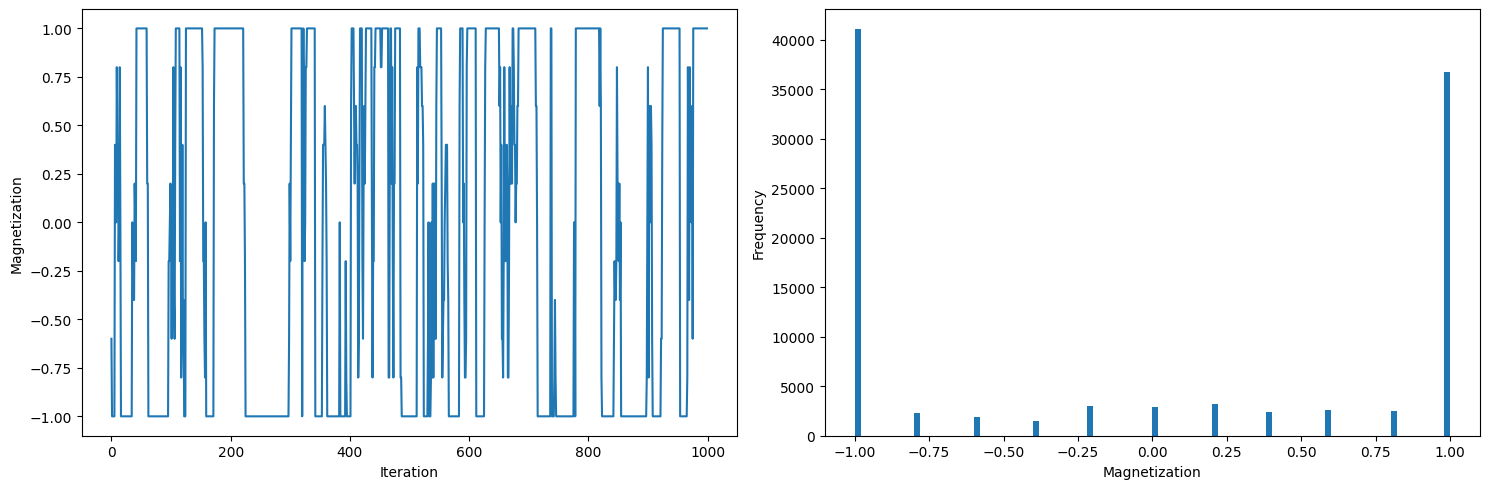

-1.0 : 41074
-0.8 : 2321
-0.6 : 1847
-0.4 : 1485
-0.2 : 2976
0.0 : 2880
0.2 : 3181
0.4 : 2366
0.6 : 2637
0.8 : 2511
1.0 : 36722


Theta = 0.7000000000000001
x_init = [ 1 -1 -1 -1  1  1 -1 -1  1 -1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


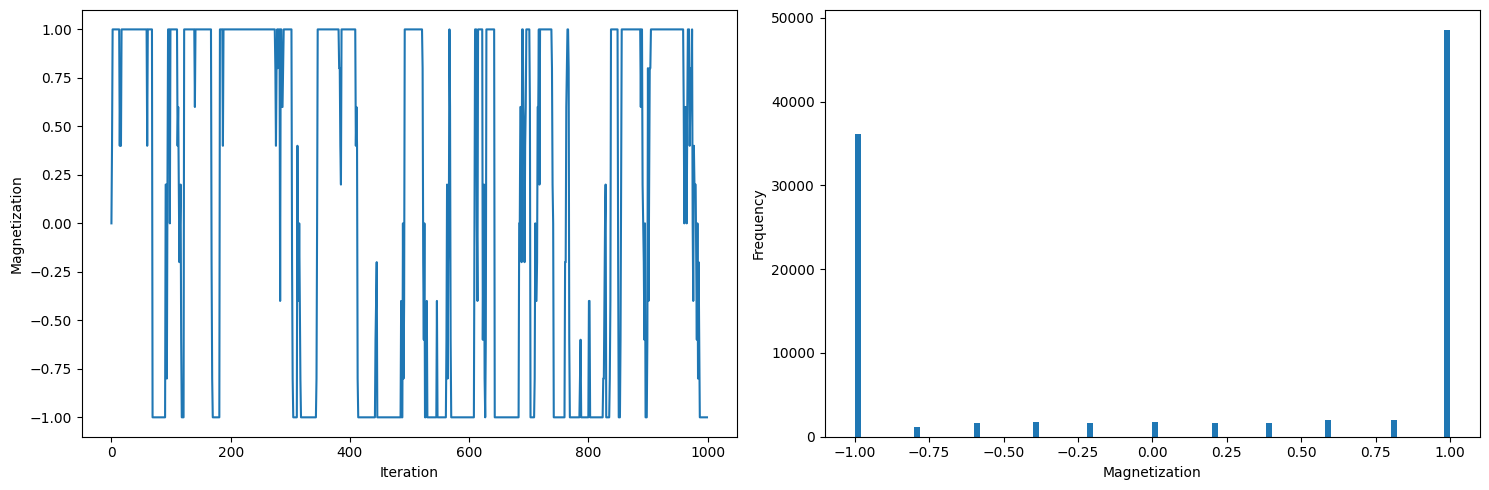

-1.0 : 36196
-0.8 : 1178
-0.6 : 1632
-0.4 : 1737
-0.2 : 1620
0.0 : 1801
0.2 : 1644
0.4 : 1691
0.6 : 2009
0.8 : 1966
1.0 : 48526


Theta = 0.8
x_init = [-1 -1  1  1 -1  1  1 -1  1 -1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


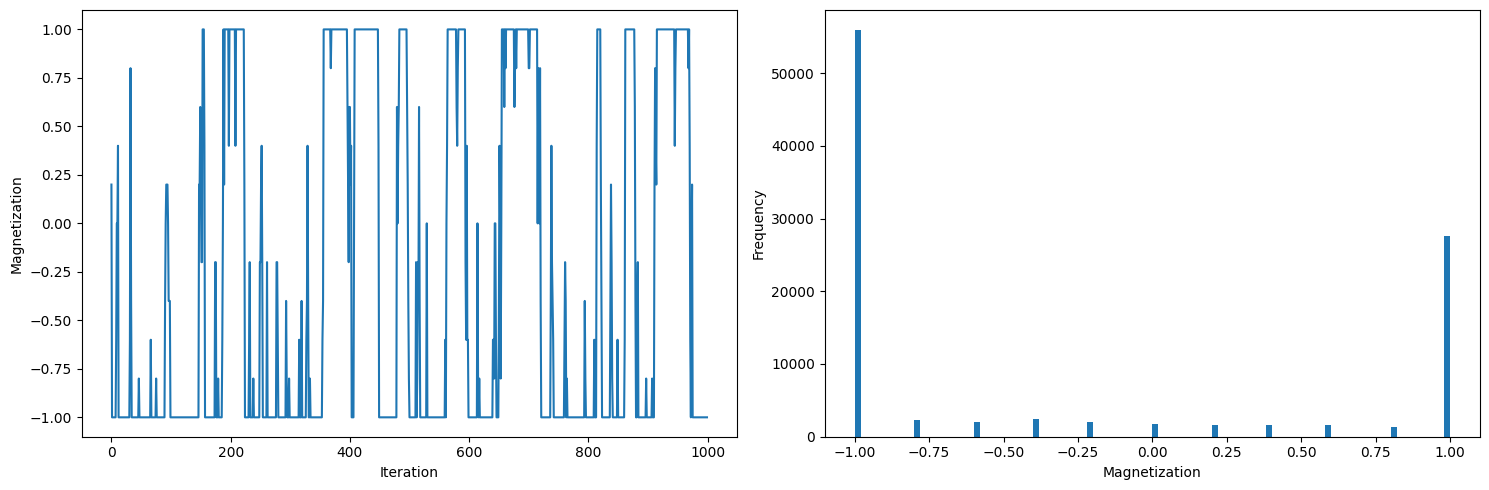

-1.0 : 55874
-0.8 : 2269
-0.6 : 2011
-0.4 : 2414
-0.2 : 1965
0.0 : 1683
0.2 : 1550
0.4 : 1593
0.6 : 1658
0.8 : 1400
1.0 : 27583


Theta = 0.9
x_init = [ 1  1 -1  1 -1 -1 -1 -1 -1  1]


  0%|          | 0/100000 [00:00<?, ?it/s]

(100000, 10)
(100000,)


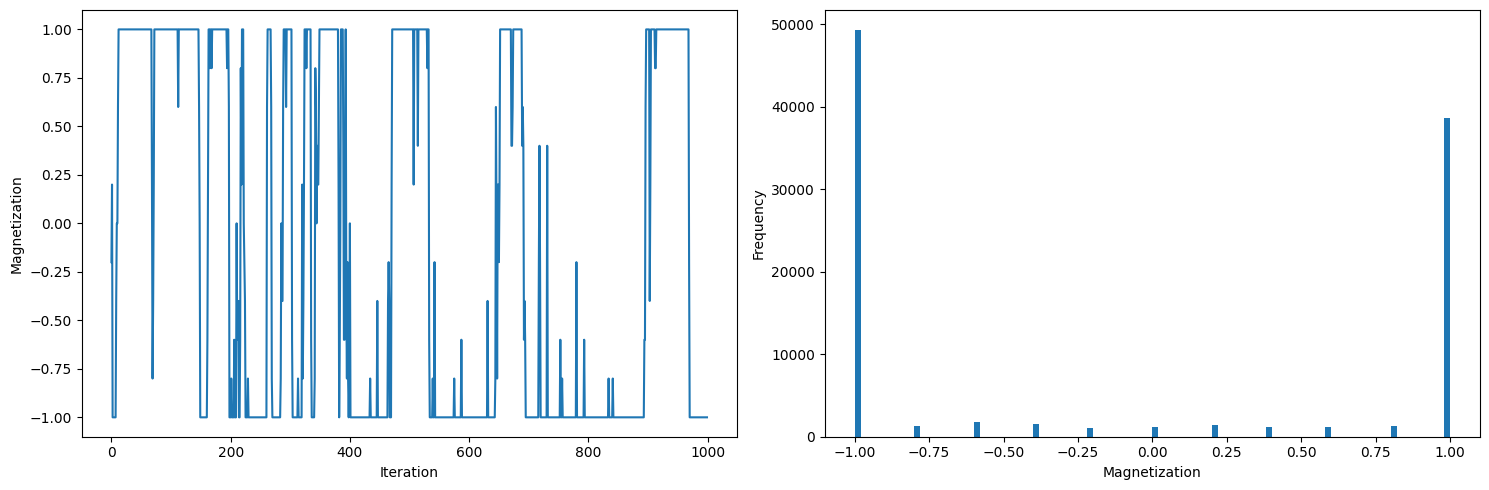

-1.0 : 49239
-0.8 : 1348
-0.6 : 1789
-0.4 : 1531
-0.2 : 1111
0.0 : 1148
0.2 : 1453
0.4 : 1169
0.6 : 1187
0.8 : 1351
1.0 : 38674




In [6]:
thetas = np.arange(0.1, 1, 0.1).tolist()

for theta in thetas:
    x_init = init_x()
    
    print("Theta = {}".format(theta))
    print("x_init = {}".format(x_init))

    X = Metropolis_Hastings(x_init, theta, N)

    magnetization = get_magnetization(X)

    print(X.shape)
    print(magnetization.shape)

    plot_magnetization(magnetization)
